<a href="https://colab.research.google.com/github/nagendraputhane/learn_computer_vision/blob/master/OpenCV_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%pylab notebook
%matplotlib inline
import cv2

Populating the interactive namespace from numpy and matplotlib


Reading and displaying image with numpy/matplotlib

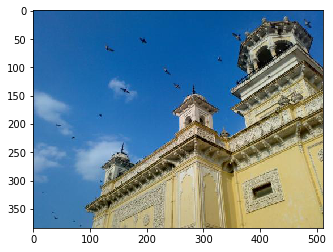

In [0]:
im2disp = imread('home.jpg')
figure()
imshow(im2disp)

now the openCV way

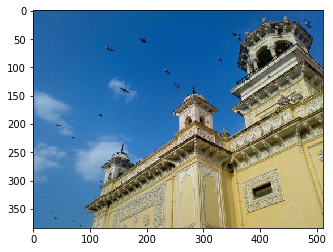

In [0]:
cvim2disp = cv2.imread('home.jpg')

imshow(cv2.cvtColor(cvim2disp, cv2.COLOR_BGR2RGB))

Blurring

1. Gaussian 

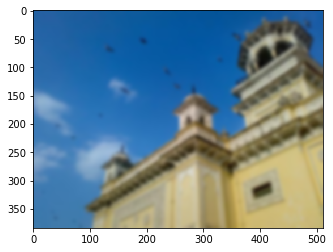

In [0]:
im2disp = imread('home.jpg')
blurred = cv2.GaussianBlur(im2disp,(19, 19), 0)
figure()
imshow(blurred)

2. Custom kernel

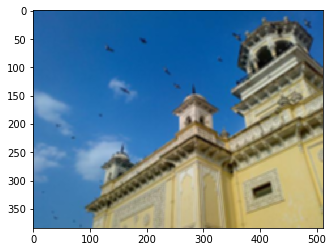

In [0]:
kernel = np.ones((5,5), np.float32)/25
blurred = cv2.filter2D(im2disp, -1, kernel)
figure()
imshow(blurred)

Saving an image

In [0]:
cv2.imwrite('mynewfile.jpg', cvim2disp)

True

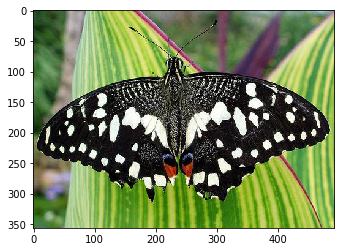

In [0]:
bfly = imread('butterfly.jpg')
figure()
imshow(bfly)

In [0]:
bfly = cv2.cvtColor(bfly, cv2.COLOR_BGR2RGB)

Grayscale

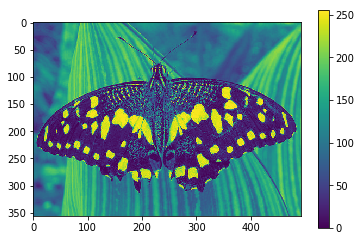

In [0]:
bflygray = cv2.cvtColor(bfly, cv2.COLOR_BGR2GRAY)
figure()
imshow(bflygray)
colorbar()

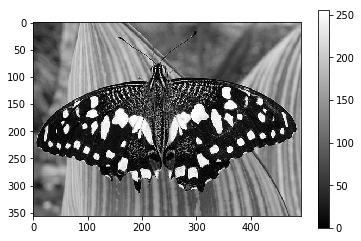

In [0]:
#you may or may not want the default rainbow map
figure()
imshow(bflygray, cmap = 'gray')
colorbar()

In [0]:
print(bfly.shape)
print(bflygray.shape)

(356, 493, 3)
(356, 493)


In [0]:
bfly.dtype

dtype('uint8')

y dimension comes first. hence height is before width

Extract RGB channels

In [0]:
redc = bfly[:, :, 0]
greenc = bfly[:, :, 1]
bluec = bfly[:, :, 2]

In [0]:
bluec.shape

(356, 493)

Recombine

In [0]:
height, width = bfly.shape[0:2]

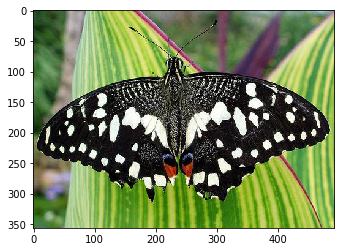

In [0]:
combined = zeros((height, width, 3), uint8)
combined[:, :, 0] = redc
combined[:, :, 1] = greenc
combined[:, :, 2] = bluec

figure()
imshow(combined)

Extract a region

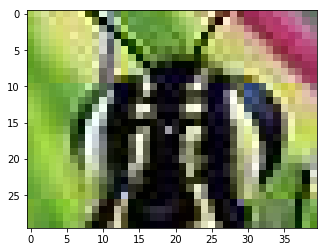

In [0]:
bflyhead = bfly[70:100, 210:250]
figure()
imshow(bflyhead)

Writing to pixels

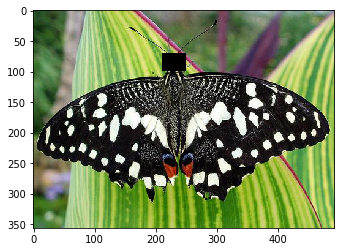

In [0]:
bfly[70:100, 210:250] = 0
figure()
imshow(bfly)

Exercises:

1) Take an image and write a big + sign over it.

In [0]:
bflycopy = bfly.copy()

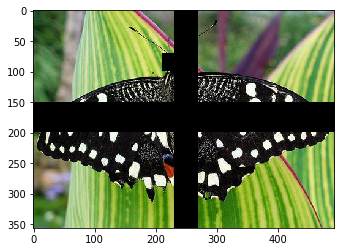

In [0]:
bflycopy[0:360, 230:270] = 0
bflycopy[150:200, 0:500] = 0
figure()
imshow(bflycopy)

2) Create a function that will take in two images and return an image that combines them into a larger side-by-side image.

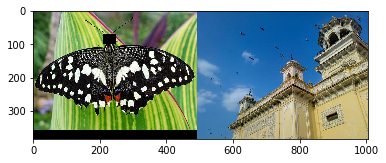

In [0]:
def sidebyside(imageleft, imageright):
  newimheight = max(imageleft.shape[0], imageright.shape[0])
  newimwidth = imageleft.shape[1] + imageright.shape[1]
  newim = zeros((newimheight, newimwidth, 3), uint8)
  newim[0:imageleft.shape[0], 0:imageleft.shape[1]] = imageleft[:, :, :]
  newim[0:imageright.shape[0], imageleft.shape[1]:newimwidth] = imageright[:, :, :]
  return newim

imshow(sidebyside(bfly, im2disp))

Image Weighted Blending

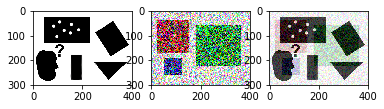

In [0]:
img1 = imread('pic1.png')
img2 = imread('pic2.png')

dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

figure()
subplot(1, 3, 1)
imshow(img1)
subplot(1, 3, 2)
imshow(img2)
subplot(1, 3, 3)
imshow(dst)

Median-blur to cartoonify a real image.

Text(0.5, 1.0, 'cartoonified')

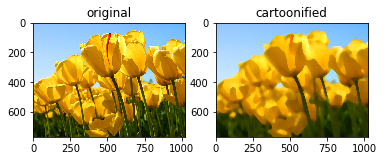

In [0]:
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips, 29)

figure()
subplot(1, 2, 1)
imshow(tulips)
title('original')
subplot(1, 2, 2)
imshow(tublur)
title('median-blur')

High-pass filtering

Text(0.5, 1.0, 'Sobel Y')

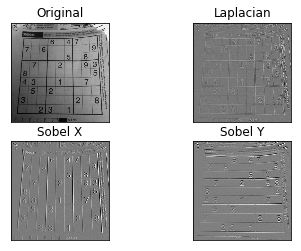

In [0]:
img = cv2.imread('sudokubig.jpg', 0)

#laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)
#sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

figure()
subplot(2, 2, 1)
imshow(img, cmap = 'gray')
xticks([]), plt.yticks([])
title('Original')
subplot(2, 2, 2)
imshow(laplacian, cmap = 'gray')
xticks([]), plt.yticks([])
title('Laplacian')
subplot(2, 2, 3)
imshow(sobelx, cmap = 'gray')
xticks([]), plt.yticks([])
title('Sobel X')
subplot(2, 2, 4)
imshow(sobely, cmap = 'gray')
xticks([]), plt.yticks([])
title('Sobel Y')


Canny Edge detection

Text(0.5, 1.0, 'Edge image')

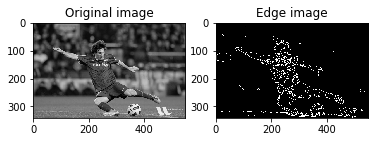

In [0]:
img = cv2.imread('messi5.jpg', 0)# the 0 parameter converts the image to grayscale
edge = cv2.Canny(img, 100, 200)

figure()
subplot(121)
imshow(img, cmap = 'gray')
title('Original image')
subplot(122)
imshow(edge, cmap = 'gray')
title('Edge image')

Morphological Operations

//its binary

//for the region of interests in the image.

Erosion

Dilation

Floodfilled

In [0]:
mgrid[-1:1:0.01, -1:1:0.01]

array([[[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
        [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
        ...,
        [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
        [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
        [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]],

       [[-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        ...,
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99]]])

Text(0.5, 1.0, 'flood-filled')

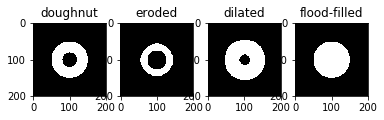

In [0]:
yy = mgrid[-1:1:0.01, -1:1:0.01][0]
xx = yy.T #transpose
circ = 0*xx
circ [xx**2+yy**2 < 0.5**2] = 1 #square(x) + square(y) < square(radius)
circ [xx**2+yy**2 < 0.2**2] = 0

#box kernel
kernel = ones((10, 10), float32)

#morphological operations
erosion = cv2.erode(circ, kernel, iterations = 1)

dilation = cv2.dilate(circ, kernel, iterations = 1)

floodfilled = cv2.floodFill(image = circ.astype(uint8).copy(), mask = None, seedPoint = (100, 100), newVal = 1)

figure()
subplot(1, 4, 1)
imshow(circ, cmap = 'gray')
title('doughnut')
subplot(1, 4, 2)
imshow(erosion, cmap = 'gray')
title('eroded')
subplot(1, 4, 3)
imshow(dilation, cmap = 'gray')
title('dilated')
subplot(1, 4, 4)
imshow(floodfilled[1].astype(float32), cmap = 'gray')
title('flood-filled')

Thresholding

hard thresholding vs adaptive thresholding 

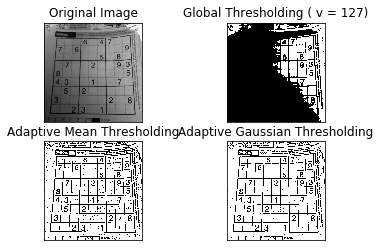

In [0]:
img = cv2.imread('sudokubig.jpg', 0)
img = cv2.medianBlur(img, 5)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding ( v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure()
for i in range(4):
  subplot(2, 2, i+1)
  plt.imshow(images[i], 'gray')
  title(titles[i])
  xticks([]), yticks([])

Image Segmentation

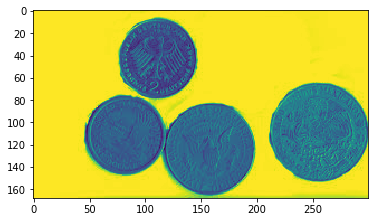

In [0]:
img = cv2.imread('coinsb.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow(gray)

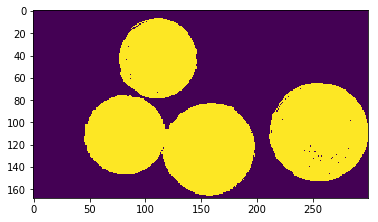

In [0]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #binary inverted + Otsu's Binarization(noise removal)
imshow(thresh)

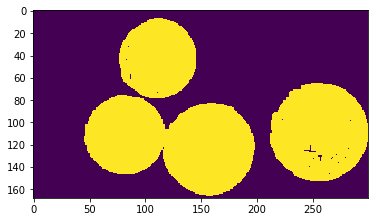

In [0]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) #opening = erosion followed by dilation
imshow(opening)

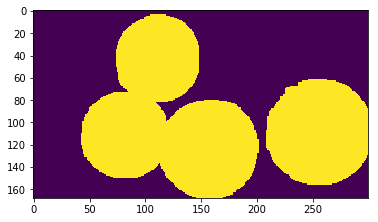

In [0]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
imshow(sure_bg)

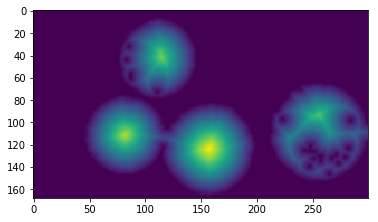

In [0]:
#In this operation, the gray level intensities of the points inside the foreground regions are changed to distance their respective distances from the closest 0 value (boundary).
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
imshow(dist_transform)

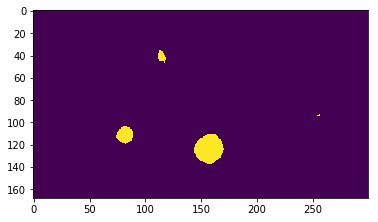

In [0]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
imshow(sure_fg)

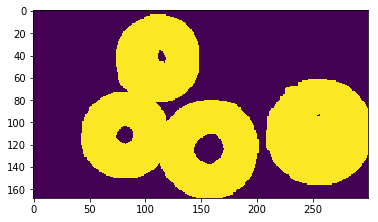

In [0]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg) #find borders
imshow(unknown)

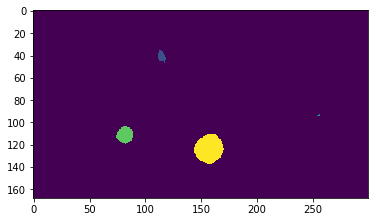

In [0]:
ret, markers = cv2.connectedComponents(sure_fg) 
imshow(markers)

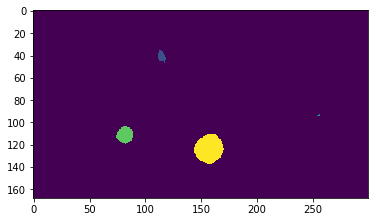

In [0]:
markers = markers+1
imshow(markers)

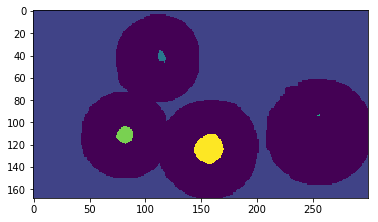

In [0]:
markers[unknown==255] = 0 #mark the region of unknown with zero
imshow(markers)

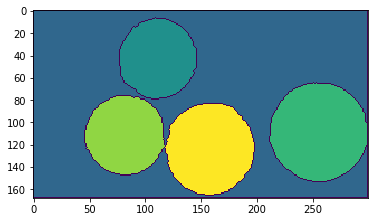

In [0]:
markers = cv2.watershed(img,markers) #extracting touching or overlapping objects
imshow(markers)

Image Transformations

Resizing

Text(0.5, 1.0, 'original                           scaled')

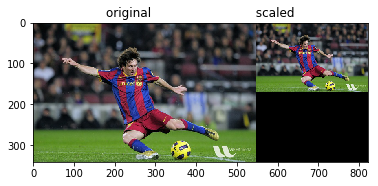

In [0]:
scalefactor = .5

img = imread('messi5.jpg')
res = cv2.resize(img, None, fx=scalefactor, fy=scalefactor, interpolation = cv2.INTER_CUBIC)

height, width = img.shape[:2]

bigwidth = int(amax([scalefactor*height, height]))#max of the heights (numpy)
bigheight = int(width*(1+scalefactor))

bigim = zeros((bigwidth, bigheight, 3), uint8)
bigim[:height, :width] = img #first image (now part of 'bigim') is the original image

if scalefactor > 1:
  bigim[:,width:] = res #height is same as 'bigim', and width is from width to final
else:
  bigim[: int(scalefactor*height), width:] = res #height will vary
  
figure()
imshow(bigim)
title('original                           scaled')

Transformation

cv2.warpAffine takes 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input

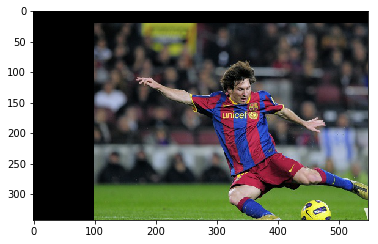

In [0]:
img = imread('messi5.jpg')
rows, cols, chans = img.shape

xshift = 100
yshift = 20

#
M = np.float32([[1, 0, xshift], [0, 1, yshift]])
dst = cv2.warpAffine(img, M, (cols, rows))

figure()
imshow(dst)

Rotation

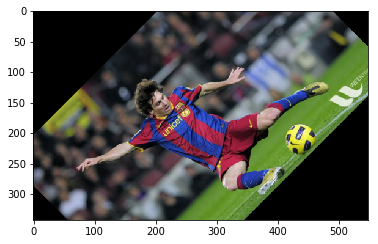

In [0]:
img = imread('messi5.jpg')
rows, cols, chans = img.shape

theta = 45.0

M = cv2.getRotationMatrix2D((cols/2, rows/2), theta, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

figure()
imshow(dst)

General affine transform

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0673c319e8>,
 Text(0.5, 1.0, 'Output'))

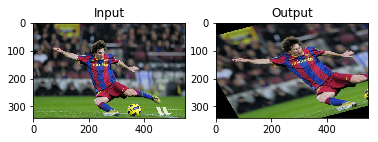

In [0]:
img = imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

figure()
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

Perspective transform:

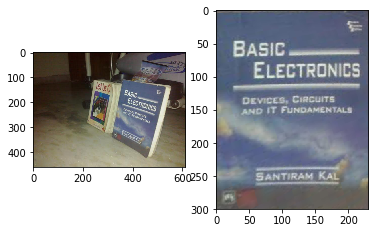

In [0]:
img = imread('right.jpg')
rows, cols, chans = img.shape

startpts =  float32([[362, 107], [530,139] , [453,416], [319,337]])
endpts   =  float32([[100, 100], [330,100],  [330,400], [100,400]])

M = cv2.getPerspectiveTransform(startpts,endpts)

dst = cv2.warpPerspective(img, M, (rows, cols))

figure()
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(dst[100:400,100:330])

Finding objects

Template matching:

Use an image and slide it over the main image and see hwere the corelation is strongest.

In [0]:
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = img[70:135,210:260]
w, h = template.shape[::-1]
w, h

(50, 65)

In [0]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

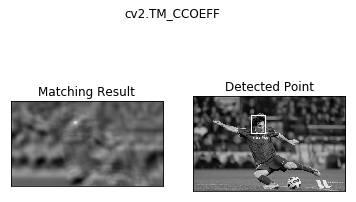

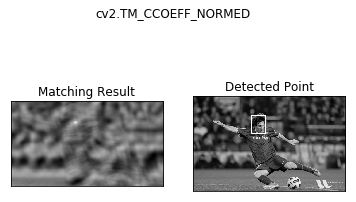

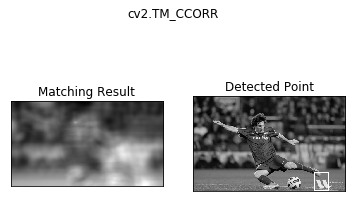

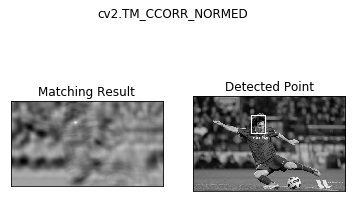

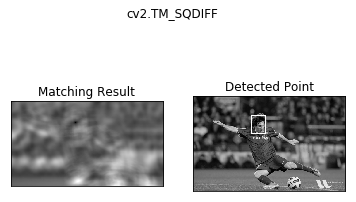

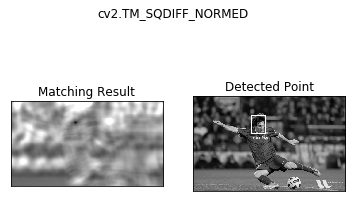

In [0]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)#returns a corelation map
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    figure()
    subplot(121)
    imshow(res,cmap = 'gray')
    title('Matching Result')
    xticks([])
    yticks([])
    subplot(122),
    imshow(img,cmap = 'gray')
    title('Detected Point')
    xticks([])
    yticks([])
    suptitle(meth)

Features 

  - Specific patterns or specific features which are unique, which can be easily tracked, which can be easily comapred.

In [0]:
img = cv2.imread('blox.jpg')
img2 = img.copy()
gray = float32(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

Corners

1) Harris corners

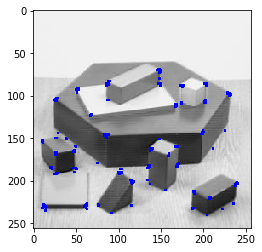

In [32]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04) #output = 1 for corners, 0 for others
dst = cv2.dilate(dst, None)
img[dst>0.01*dst.max()] = [0, 0, 255]
imshow(img)

2) Shi-Tomasi corners, AKA "good features to track"

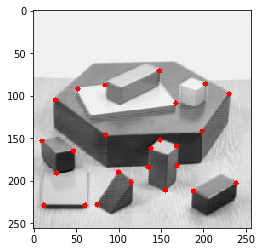

In [33]:
corners = int0(cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)) #int0 = int64
for i in corners:
  x, y = i.ravel()
  cv2.circle(img2, (x,y), 3, 255, -1) #draw circle around (x,y)
imshow(img2)